In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from imblearn.over_sampling import SMOTE
from scipy import stats

In [29]:
file_path = "C:/Users/PMLS/Desktop/All desktop things/DS internship/creditcard.csv"
df = pd.read_csv(file_path)

In [30]:
# Data Inspection
print("Dataset Information:\n", df.info())
print("Dataset Head:\n", df.head())
print("\nDataset Tail:\n", df.tail())
print("\nDataset Dimensions:", df.shape)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Statistics:\n", df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [31]:
print("\nColumns:", df.columns.tolist())
print("\nDataset Dimensions:", df.shape)


Columns: ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

Dataset Dimensions: (284807, 31)


In [32]:
df.drop_duplicates(inplace=True)
print("\nMissing Values After Cleaning:\n", df.isnull().sum())
df.dropna(inplace=True)
print("\nDataset Dimensions After Cleaning:", df.shape)


Missing Values After Cleaning:
 Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

Dataset Dimensions After Cleaning: (283726, 31)


In [33]:
# Identify outliers using Z-score

z_scores = stats.zscore(df.select_dtypes(include=[np.number]))
outliers = (np.abs(z_scores) > 3).sum()
print("\nOutliers Count Per Column:")
print(outliers)


Outliers Count Per Column:
Time         0
V1        3647
V2        4303
V3        1953
V4        3101
V5        2913
V6        4638
V7        3404
V8        4205
V9        2253
V10       3450
V11        661
V12       3446
V13       1189
V14       3378
V15       1252
V16       2085
V17       2520
V18       1669
V19       3395
V20       4594
V21       4096
V22       1212
V23       3356
V24        659
V25       2799
V26       1044
V27       4775
V28       3236
Amount    4063
Class      473
dtype: int64


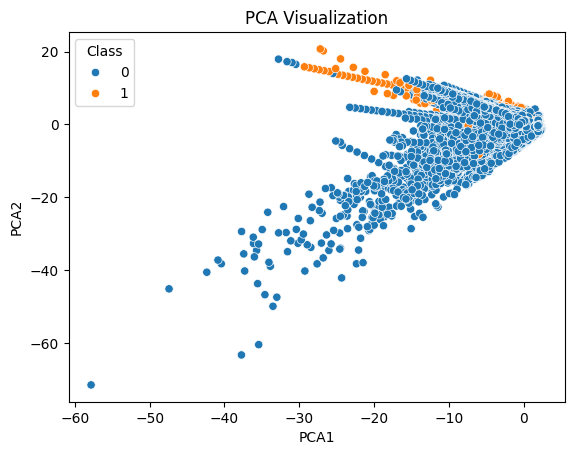

In [34]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df.drop(columns=['Class', 'Time', 'Amount']))
df['PCA1'] = pca_result[:,0]
df['PCA2'] = pca_result[:,1]
sns.scatterplot(x='PCA1', y='PCA2', hue='Class', data=df) # Added data=df
plt.title("PCA Visualization")
plt.show()


In [35]:
X = df.drop(columns=['Class'])
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [36]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)
print("Class distribution after SMOTE:")
print((y_train_resampled))

Class distribution after SMOTE:
0         0
1         0
2         0
3         0
4         0
         ..
453199    1
453200    1
453201    1
453202    1
453203    1
Name: Class, Length: 453204, dtype: int64


In [38]:
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_pred))
    return model

In [39]:
models = {
    "Logistic Regression": LogisticRegression(),
    # "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

In [41]:
for name, model in models.items():
    print(f"\nEvaluating {name}...")
    evaluate_model(model, X_train_resampled, X_test, y_train_resampled, y_test)


Evaluating Logistic Regression...


c:\Users\PMLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56651
           1       0.07      0.89      0.13        95

    accuracy                           0.98     56746
   macro avg       0.54      0.94      0.56     56746
weighted avg       1.00      0.98      0.99     56746



NameError: name 'accuracy_score' is not defined

In [ ]:
final_model = RandomForestClassifier()
final_model.fit(X_train_resampled, y_train_resampled)
y_pred_final = final_model.predict(X_test)